In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#First Model Layer
model.add(Dense(units=10, activation='relu', input_dim=20))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
# df = df.drop(columns=['Unnamed: 32'])

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

y = df['diagnosis']
X = df.drop(columns=['id','diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

for label, original_class in zip(encoded_y,y):
    print(str(original_class) + ":" + (str(label)))

M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
B:0
B:0
B:0
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
B:0
M:1
M:1
M:1
M:1
M:1
M:1
M:1
M:1
B:0
M:1
B:0
B:0
B:0
B:0
B:0
M:1
M:1
B:0
M:1
M:1
B:0
B:0
B:0
B:0
M:1
B:0
M:1
M:1
B:0
B:0
B:0
B:0
M:1
B:0
M:1
M:1
B:0
M:1
B:0
M:1
M:1
B:0
B:0
B:0
M:1
M:1
B:0
M:1
M:1
M:1
B:0
B:0
B:0
M:1
B:0
B:0
M:1
M:1
B:0
B:0
B:0
M:1
M:1
B:0
B:0
B:0
B:0
M:1
B:0
B:0
M:1
B:0
B:0
B:0
B:0
B:0
B:0
B:0
B:0
M:1
M:1
M:1
B:0
M:1
M:1
B:0
B:0
B:0
M:1
M:1
B:0
M:1
B:0
M:1
M:1
B:0
M:1
M:1
B:0
B:0
M:1
B:0
B:0
M:1
B:0
B:0
B:0
B:0
M:1
B:0
B:0
B:0
B:0
B:0
B:0
B:0
B:0
B:0
M:1
B:0
B:0
B:0
B:0
M:1
M:1
B:0
M:1
B:0
B:0
M:1
M:1
B:0
B:0
M:1
M:1
B:0
B:0
B:0
B:0
M:1
B:0
B:0
M:1
M:1
M:1
B:0
M:1
B:0
M:1
B:0
B:0
B:0
M:1
B:0
B:0
M:1
M:1
B:0
M:1
M:1
M:1
M:1
B:0
M:1
M:1
M:1
B:0
M:1
B:0
M:1
B:0
B:0
M:1
B:0
M:1
M:1
M:1
M:1
B:0
B:0
M:1
M:1
B:0
B:0
B:0
M:1
B:0
B:0
B:0
B:0
B:0
M:1
M:1
B:0
B:0
M:1
B:0
B:0
M:1
M:1
B:0
M:1
B:0
B:0
B:0
B:0
M:1
B:0
B:0
B:0
B:0
B:0


Using TensorFlow backend.


In [5]:
from keras.utils import to_categorical

hot_y = to_categorical(encoded_y)
hot_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, hot_y, random_state=1, stratify=hot_y)

In [7]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
model.fit(X_train_scaled,
         y_train,
         epochs=1000,
         shuffle=True,
         verbose=2)

Epoch 1/1000
426/426 - 0s - loss: 0.6700 - acc: 0.6197
Epoch 2/1000
426/426 - 0s - loss: 0.6169 - acc: 0.7840
Epoch 3/1000
426/426 - 0s - loss: 0.5691 - acc: 0.8545
Epoch 4/1000
426/426 - 0s - loss: 0.5184 - acc: 0.8967
Epoch 5/1000
426/426 - 0s - loss: 0.4658 - acc: 0.9178
Epoch 6/1000
426/426 - 0s - loss: 0.4125 - acc: 0.9202
Epoch 7/1000
426/426 - 0s - loss: 0.3612 - acc: 0.9343
Epoch 8/1000
426/426 - 0s - loss: 0.3153 - acc: 0.9390
Epoch 9/1000
426/426 - 0s - loss: 0.2735 - acc: 0.9413
Epoch 10/1000
426/426 - 0s - loss: 0.2378 - acc: 0.9484
Epoch 11/1000
426/426 - 0s - loss: 0.2055 - acc: 0.9484
Epoch 12/1000
426/426 - 0s - loss: 0.1810 - acc: 0.9484
Epoch 13/1000
426/426 - 0s - loss: 0.1621 - acc: 0.9507
Epoch 14/1000
426/426 - 0s - loss: 0.1488 - acc: 0.9577
Epoch 15/1000
426/426 - 0s - loss: 0.1379 - acc: 0.9601
Epoch 16/1000
426/426 - 0s - loss: 0.1295 - acc: 0.9601
Epoch 17/1000
426/426 - 0s - loss: 0.1226 - acc: 0.9624
Epoch 18/1000
426/426 - 0s - loss: 0.1173 - acc: 0.9671
E

Epoch 147/1000
426/426 - 0s - loss: 0.0203 - acc: 0.9953
Epoch 148/1000
426/426 - 0s - loss: 0.0201 - acc: 0.9953
Epoch 149/1000
426/426 - 0s - loss: 0.0200 - acc: 0.9953
Epoch 150/1000
426/426 - 0s - loss: 0.0198 - acc: 0.9953
Epoch 151/1000
426/426 - 0s - loss: 0.0199 - acc: 0.9953
Epoch 152/1000
426/426 - 0s - loss: 0.0198 - acc: 0.9953
Epoch 153/1000
426/426 - 0s - loss: 0.0199 - acc: 0.9953
Epoch 154/1000
426/426 - 0s - loss: 0.0195 - acc: 0.9953
Epoch 155/1000
426/426 - 0s - loss: 0.0199 - acc: 0.9953
Epoch 156/1000
426/426 - 0s - loss: 0.0193 - acc: 0.9953
Epoch 157/1000
426/426 - 0s - loss: 0.0189 - acc: 0.9953
Epoch 158/1000
426/426 - 0s - loss: 0.0186 - acc: 0.9953
Epoch 159/1000
426/426 - 0s - loss: 0.0183 - acc: 0.9953
Epoch 160/1000
426/426 - 0s - loss: 0.0181 - acc: 0.9953
Epoch 161/1000
426/426 - 0s - loss: 0.0180 - acc: 0.9953
Epoch 162/1000
426/426 - 0s - loss: 0.0178 - acc: 0.9953
Epoch 163/1000
426/426 - 0s - loss: 0.0178 - acc: 0.9953
Epoch 164/1000
426/426 - 0s - l

Epoch 291/1000
426/426 - 0s - loss: 0.0080 - acc: 0.9953
Epoch 292/1000
426/426 - 0s - loss: 0.0080 - acc: 0.9953
Epoch 293/1000
426/426 - 0s - loss: 0.0078 - acc: 0.9953
Epoch 294/1000
426/426 - 0s - loss: 0.0079 - acc: 0.9953
Epoch 295/1000
426/426 - 0s - loss: 0.0078 - acc: 0.9953
Epoch 296/1000
426/426 - 0s - loss: 0.0077 - acc: 0.9953
Epoch 297/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 298/1000
426/426 - 0s - loss: 0.0077 - acc: 0.9953
Epoch 299/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 300/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 301/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 302/1000
426/426 - 0s - loss: 0.0074 - acc: 0.9953
Epoch 303/1000
426/426 - 0s - loss: 0.0076 - acc: 0.9953
Epoch 304/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 305/1000
426/426 - 0s - loss: 0.0073 - acc: 0.9953
Epoch 306/1000
426/426 - 0s - loss: 0.0075 - acc: 0.9953
Epoch 307/1000
426/426 - 0s - loss: 0.0073 - acc: 0.9953
Epoch 308/1000
426/426 - 0s - l

Epoch 435/1000
426/426 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 436/1000
426/426 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 437/1000
426/426 - 0s - loss: 0.0030 - acc: 0.9977
Epoch 438/1000
426/426 - 0s - loss: 0.0029 - acc: 1.0000
Epoch 439/1000
426/426 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 440/1000
426/426 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 441/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 442/1000
426/426 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 443/1000
426/426 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 444/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 445/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 446/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 447/1000
426/426 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 448/1000
426/426 - 0s - loss: 0.0027 - acc: 0.9977
Epoch 449/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 450/1000
426/426 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 451/1000
426/426 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 452/1000
426/426 - 0s - l

Epoch 579/1000
426/426 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 580/1000
426/426 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 581/1000
426/426 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 582/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 583/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 584/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 585/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 586/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 587/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 588/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 589/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 590/1000
426/426 - 0s - loss: 0.0013 - acc: 1.0000
Epoch 591/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 592/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 593/1000
426/426 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 594/1000
426/426 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 595/1000
426/426 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 596/1000
426/426 - 0s - l

Epoch 717/1000
426/426 - 0s - loss: 6.9769e-04 - acc: 1.0000
Epoch 718/1000
426/426 - 0s - loss: 6.6442e-04 - acc: 1.0000
Epoch 719/1000
426/426 - 0s - loss: 6.5683e-04 - acc: 1.0000
Epoch 720/1000
426/426 - 0s - loss: 6.4505e-04 - acc: 1.0000
Epoch 721/1000
426/426 - 0s - loss: 6.4082e-04 - acc: 1.0000
Epoch 722/1000
426/426 - 0s - loss: 6.3530e-04 - acc: 1.0000
Epoch 723/1000
426/426 - 0s - loss: 6.2654e-04 - acc: 1.0000
Epoch 724/1000
426/426 - 0s - loss: 6.2078e-04 - acc: 1.0000
Epoch 725/1000
426/426 - 0s - loss: 6.1412e-04 - acc: 1.0000
Epoch 726/1000
426/426 - 0s - loss: 6.0810e-04 - acc: 1.0000
Epoch 727/1000
426/426 - 0s - loss: 6.2599e-04 - acc: 1.0000
Epoch 728/1000
426/426 - 0s - loss: 6.2227e-04 - acc: 1.0000
Epoch 729/1000
426/426 - 0s - loss: 6.4792e-04 - acc: 1.0000
Epoch 730/1000
426/426 - 0s - loss: 6.2374e-04 - acc: 1.0000
Epoch 731/1000
426/426 - 0s - loss: 6.0903e-04 - acc: 1.0000
Epoch 732/1000
426/426 - 0s - loss: 6.4861e-04 - acc: 1.0000
Epoch 733/1000
426/426 -

Epoch 852/1000
426/426 - 0s - loss: 3.4892e-04 - acc: 1.0000
Epoch 853/1000
426/426 - 0s - loss: 3.4580e-04 - acc: 1.0000
Epoch 854/1000
426/426 - 0s - loss: 3.4385e-04 - acc: 1.0000
Epoch 855/1000
426/426 - 0s - loss: 3.4160e-04 - acc: 1.0000
Epoch 856/1000
426/426 - 0s - loss: 3.3871e-04 - acc: 1.0000
Epoch 857/1000
426/426 - 0s - loss: 3.3732e-04 - acc: 1.0000
Epoch 858/1000
426/426 - 0s - loss: 3.4216e-04 - acc: 1.0000
Epoch 859/1000
426/426 - 0s - loss: 7.2155e-04 - acc: 1.0000
Epoch 860/1000
426/426 - 0s - loss: 4.3371e-04 - acc: 1.0000
Epoch 861/1000
426/426 - 0s - loss: 5.7317e-04 - acc: 1.0000
Epoch 862/1000
426/426 - 0s - loss: 3.7955e-04 - acc: 1.0000
Epoch 863/1000
426/426 - 0s - loss: 4.3696e-04 - acc: 1.0000
Epoch 864/1000
426/426 - 0s - loss: 3.6244e-04 - acc: 1.0000
Epoch 865/1000
426/426 - 0s - loss: 3.4038e-04 - acc: 1.0000
Epoch 866/1000
426/426 - 0s - loss: 3.3454e-04 - acc: 1.0000
Epoch 867/1000
426/426 - 0s - loss: 3.2940e-04 - acc: 1.0000
Epoch 868/1000
426/426 -

Epoch 987/1000
426/426 - 0s - loss: 1.8874e-04 - acc: 1.0000
Epoch 988/1000
426/426 - 0s - loss: 1.9544e-04 - acc: 1.0000
Epoch 989/1000
426/426 - 0s - loss: 2.0227e-04 - acc: 1.0000
Epoch 990/1000
426/426 - 0s - loss: 2.1455e-04 - acc: 1.0000
Epoch 991/1000
426/426 - 0s - loss: 2.0289e-04 - acc: 1.0000
Epoch 992/1000
426/426 - 0s - loss: 1.9219e-04 - acc: 1.0000
Epoch 993/1000
426/426 - 0s - loss: 1.8774e-04 - acc: 1.0000
Epoch 994/1000
426/426 - 0s - loss: 1.8475e-04 - acc: 1.0000
Epoch 995/1000
426/426 - 0s - loss: 1.8279e-04 - acc: 1.0000
Epoch 996/1000
426/426 - 0s - loss: 1.8196e-04 - acc: 1.0000
Epoch 997/1000
426/426 - 0s - loss: 1.8041e-04 - acc: 1.0000
Epoch 998/1000
426/426 - 0s - loss: 1.7965e-04 - acc: 1.0000
Epoch 999/1000
426/426 - 0s - loss: 1.7851e-04 - acc: 1.0000
Epoch 1000/1000
426/426 - 0s - loss: 1.7746e-04 - acc: 1.0000


In [9]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train, verbose=2)
print(f"Training Data Loss: {model_loss}, Accuracy: {model_accuracy}")
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Testing Data Loss: {model_loss}, Accuracy: {model_accuracy}")

426/426 - 0s - loss: 1.7701e-04 - acc: 1.0000
Training Data Loss: 0.00017701136106287706, Accuracy: 1.0
143/143 - 0s - loss: 0.6342 - acc: 0.9650
Testing Data Loss: 0.634216694861187, Accuracy: 0.9650349617004395


In [10]:
predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(predictions)
print(prediction_labels)
print(predictions)

['M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B']
[1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0]


In [11]:
from sklearn.metrics import classification_report

y_test_labels = [np.argmax(y, axis=None, out=None) for y in y_test]
y_test_classes = label_encoder.inverse_transform(y_test_labels)

print(classification_report(y_test_classes, prediction_labels, target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.96      0.99      0.97        90
   malignant       0.98      0.92      0.95        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [12]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, filename, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(filename)
    return ax

Normalized confusion matrix
[[0.98888889 0.01111111]
 [0.0754717  0.9245283 ]]


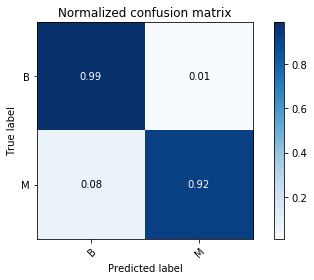

In [13]:
class_names = ["B", "M"]
filename = "images/DNNconfusionmatrix.png"
plot_confusion_matrix(np.asarray(y_test_labels), predictions, filename, classes=np.asarray(class_names),
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

Confusion matrix, without normalization
[[89  1]
 [ 4 49]]


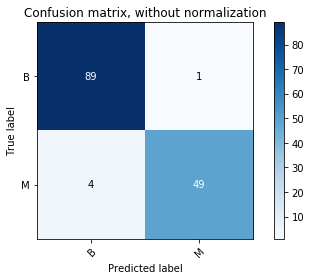

In [14]:
filename = "images/DNNconfusionmatrix2.png"
plot_confusion_matrix(np.asarray(y_test_labels), predictions, filename, classes=np.asarray(class_names),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)

In [15]:
model.save("models/tumorDNN.h5")